# Compare with different classification model

Compare the training time and performance between five classification models:

1. KNN
2. Logistic Regression
3. Decision Tree
4. Neural Network
5. SVM

I use the 3 sample datasets and make average to compare the differenct models:

1. Iris (The most simplist dataset to train)
2. Wine (A little bit complex... The feature is more than Iris dataset)
3. Digit (Image dataset)

# Conclusion

The average training time: Neural Network > SVM > KNN > Logistic Regression > Decision Tree  
The average f1-score: the same

So we could see that the neural need more resourse to training the data set.  
Although the nerual network have the good performance in classification, it need more time and resourse to training the data.  
In the small data, sometimes the logistic regression and decision tree could make the good performance also time saving.  

# Start Comparing

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.datasets import load_iris, load_wine, load_digits

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.cross_validation import train_test_split as cv
from sklearn.metrics import f1_score

import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
#Define dataset loading function
def load_data(dataset_fn):
    data = dataset_fn
    return data.data, data.target

## Define all classfier

In [13]:
#Define the classifier
knn = KNeighborsClassifier()
svm = LinearSVC()
lr = LogisticRegression()
tree = DecisionTreeClassifier()
nn = MLPClassifier()

classifier_lst = [knn, lr, svm, tree, nn]
classifier_lst_name = ['KNN', 'Logistic_Regression', 'SVM', 'DecisionTree', 'NeuralNetwork']

## Define classifier training function

In [14]:
def make_baseline(dataset_fn, classifier):
    
    start_time = time.time()
    
    feature, target = load_data(dataset_fn)
    x_train, x_test, y_train, y_test = cv(feature, target, random_state = 42)
    classifier.fit(x_train, y_train)
    
    training_score = classifier.score(x_train, y_train)
    testing_score = classifier.score(x_test, y_test)
    score = f1_score(y_test, classifier.predict(x_test), average='weighted')
    
    print(classifier)
    print('Training Score: {:.4f}'.format(training_score))
    print('Testing Score: {:.4f}'.format(testing_score))
    print('The f1 score is: {}'.format(score))

    end_time = time.time()
    training_time = end_time-start_time
    
    print('The training time is: {:.4f}\n'.format((training_time)))
    
    return score, training_time

## Start to training differenct dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0028

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0031

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.9732
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0069

DecisionTreeClassifier(class_weight=None, criterion='gini', max_dept

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'F1-Score')

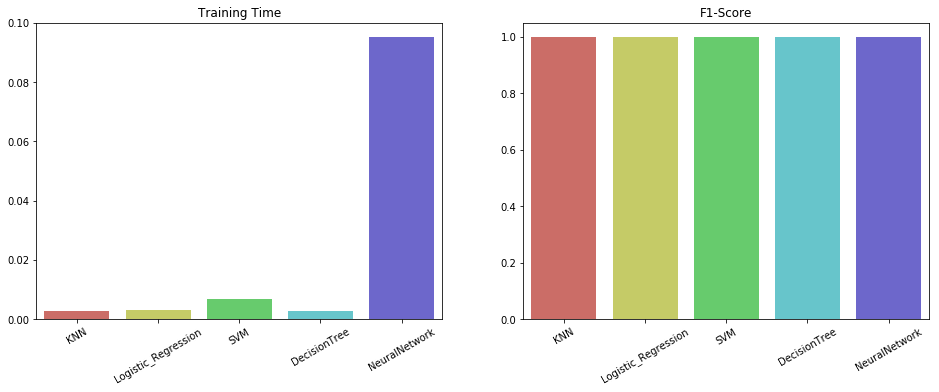

In [15]:
#Iris dataset
iris = load_iris()
iris_score_lst = []
iris_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(iris,i)
    iris_score_lst.append(score)
    iris_time_lst.append(training_time)

plt.figure(figsize=(16,12))
subplot(2,2,1)
sn.barplot(x=classifier_lst_name, y=iris_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')

subplot(2,2,2)
sn.barplot(x=classifier_lst_name, y=iris_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0032

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0028

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.9732
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0074

DecisionTreeClassifier(class_weight=None, criterion='gini', max_dept

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'F1-Score')

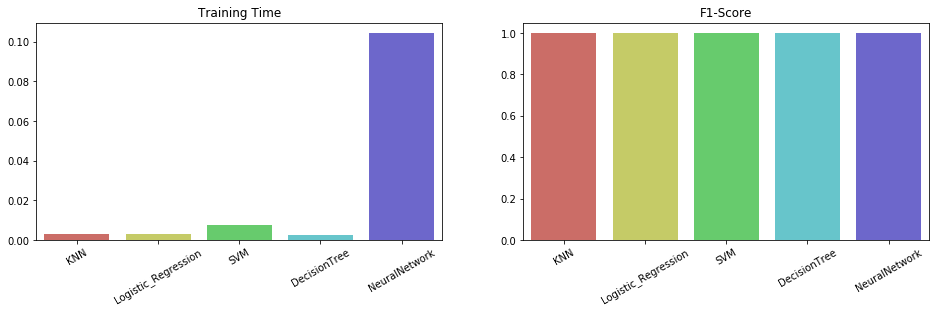

In [16]:
#Wine dataset
wine = load_wine()
wine_score_lst = []
wine_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(iris,i)
    wine_score_lst.append(score)
    wine_time_lst.append(training_time)

plt.figure(figsize=(16,4))
subplot(1,2,1)
sn.barplot(x=classifier_lst_name, y=wine_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')
subplot(1,2,2)
sn.barplot(x=classifier_lst_name, y=wine_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0029

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0025

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.9732
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0072

DecisionTreeClassifier(class_weight=None, criterion='gini', max_dept

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'F1-Score')

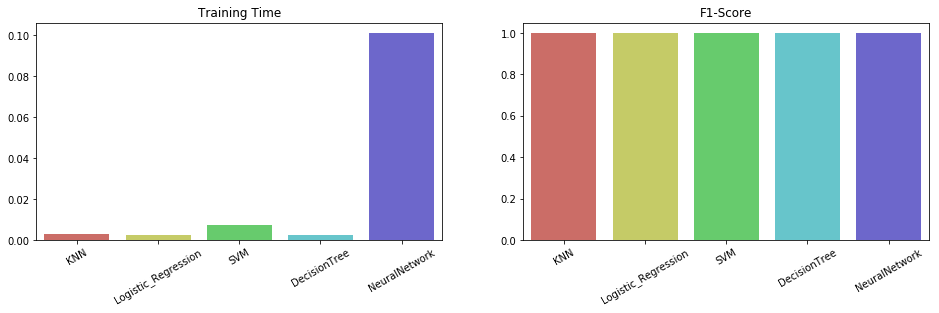

In [17]:
#Digits Dataset
digits = load_digits()
digits_score_lst = []
digits_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(iris,i)
    digits_score_lst.append(score)
    digits_time_lst.append(training_time)

plt.figure(figsize=(16,4))
subplot(1,2,1)
sn.barplot(x=classifier_lst_name, y=digits_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')
subplot(1,2,2)
sn.barplot(x=classifier_lst_name, y=digits_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

In [18]:
for idx, name in enumerate(classifier_lst_name):
    print('The classifier is: {}'.format(name))
    avg_time = np.mean([iris_time_lst[idx], wine_time_lst[idx], digits_time_lst[idx]])
    avg_score = np.mean([iris_score_lst[idx], wine_score_lst[idx], digits_score_lst[idx]])
    print('Average training time is: {}'.format(avg_time))
    print('Average training score is {}\n'.format(avg_score))

The classifier is: KNN
Average training time is: 0.002987066904703776
Average training score is 1.0

The classifier is: Logistic_Regression
Average training time is: 0.002794663111368815
Average training score is 1.0

The classifier is: SVM
Average training time is: 0.007169644037882487
Average training score is 1.0

The classifier is: DecisionTree
Average training time is: 0.00264890988667806
Average training score is 1.0

The classifier is: NeuralNetwork
Average training time is: 0.10026303927103679
Average training score is 1.0

